# gör backtesting på en stochastic startegy

In [270]:
import yfinance as yf
import ta
import pandas as pd
import matplotlib.pyplot as plt


In [271]:
df = yf.download("BTC-USD", start="2015-01-01")

[*********************100%***********************]  1 of 1 completed


In [272]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
...,...,...,...,...,...,...
2022-07-13,19325.972656,20223.052734,18999.953125,20212.074219,20212.074219,33042430345
2022-07-14,20211.466797,20789.894531,19689.257812,20569.919922,20569.919922,31158743333
2022-07-15,20573.156250,21138.244141,20397.000000,20836.328125,20836.328125,25905575359


## addera indicators

In [273]:
def indicators(df):
    df['SMA_200'] = ta.trend.sma_indicator(df['Close'], window=200)
    df['stoch_k'] = ta.momentum.stochrsi_k(df['Close'], window=10)
    df.dropna(inplace=True)
    

In [274]:
indicators(df)

In [275]:
df['Buy'] = (df['Close'] > df['SMA_200']) & (df['stoch_k'] < 0.05)
# df['Sell'] = (df['Close'] < df['SMA_200']) & (df['stoch_k'] > 0.95)

In [276]:
buydates, selldates = [],[]
buys, sells = [],[]

last_selldate = pd.to_datetime("1900-01-01")  # last sell date to avoid selling before buying
# buydate = last_selldate
for row in range(len(df)):
    if len(selldates) > 0:
        last_selldate = selldates[-1]
    
    if df.iloc[row].Buy:
        # print('buy')
        buyprice = df.iloc[row].Close * 0.97  # take a 3% margin
        
        for k in range(1,11):
            if buyprice >= df.iloc[row+k].Low:
                buydate = df.iloc[row+k].name
                break
        
        if buydate > last_selldate:
            buydates.append(buydate)
            buys.append(buyprice)
            for j in range(1,11):    
                if df.iloc[row+k+j].Close > buyprice:
                    sellprice = df.iloc[row+k+j+1].Open
                    selldate = df.iloc[row+k+j+1].name 
                    sells.append(sellprice)
                    selldates.append(selldate)
                    break
                elif j==10:
                    sellprice = df.iloc[row+k+j+1].Open
                    selldate = df.iloc[row+k+j+1].name 
                    sells.append(sellprice)
                    selldates.append(selldate)


In [277]:
buydates

[Timestamp('2022-06-17 00:00:00'),
 Timestamp('2022-06-17 00:00:00'),
 Timestamp('2022-06-17 00:00:00'),
 Timestamp('2015-08-08 00:00:00'),
 Timestamp('2015-11-10 00:00:00'),
 Timestamp('2015-12-26 00:00:00'),
 Timestamp('2016-01-15 00:00:00'),
 Timestamp('2016-03-05 00:00:00'),
 Timestamp('2016-06-23 00:00:00'),
 Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-13 00:00:00'),
 Timestamp('2017-06-15 00:00:00'),
 Timestamp('2017-06-26 00:00:00'),
 Timestamp('2017-08-22 00:00:00'),
 Timestamp('2017-09-05 00:00:00'),
 Timestamp('2017-09-13 00:00:00'),
 Timestamp('2017-11-12 00:00:00'),
 Timestamp('2017-12-22 00:00:00'),
 Timestamp('2018-01-22 00:00:00'),
 Timestamp('2018-02-02 00:00:00'),
 Timestamp('2018-03-10 00:00:00'),
 Timestamp('2019-06-06 00:00:00'),
 Timestamp('2019-07-02 00:00:00'),
 Timestamp('2019-08-15 00:00:00'),
 Timestamp('2019-09-26 00:00:00'),
 Timestamp('2020-02-25 00:00:00'),
 Timestamp('2020-09-03 00:00:00'),
 Timestamp('2020-12-11 00:00:00'),
 Timestamp('2021-01-

In [278]:
selldates

[Timestamp('2015-07-30 00:00:00'),
 Timestamp('2015-07-31 00:00:00'),
 Timestamp('2015-08-01 00:00:00'),
 Timestamp('2015-08-19 00:00:00'),
 Timestamp('2015-11-21 00:00:00'),
 Timestamp('2015-12-30 00:00:00'),
 Timestamp('2016-01-21 00:00:00'),
 Timestamp('2016-03-07 00:00:00'),
 Timestamp('2016-06-25 00:00:00'),
 Timestamp('2017-01-11 00:00:00'),
 Timestamp('2017-01-15 00:00:00'),
 Timestamp('2017-06-17 00:00:00'),
 Timestamp('2017-06-28 00:00:00'),
 Timestamp('2017-08-24 00:00:00'),
 Timestamp('2017-09-07 00:00:00'),
 Timestamp('2017-09-19 00:00:00'),
 Timestamp('2017-11-14 00:00:00'),
 Timestamp('2017-12-27 00:00:00'),
 Timestamp('2018-01-24 00:00:00'),
 Timestamp('2018-02-04 00:00:00'),
 Timestamp('2018-03-12 00:00:00'),
 Timestamp('2019-06-08 00:00:00'),
 Timestamp('2019-07-04 00:00:00'),
 Timestamp('2019-08-17 00:00:00'),
 Timestamp('2019-09-28 00:00:00'),
 Timestamp('2020-03-07 00:00:00'),
 Timestamp('2020-09-14 00:00:00'),
 Timestamp('2020-12-13 00:00:00'),
 Timestamp('2021-01-

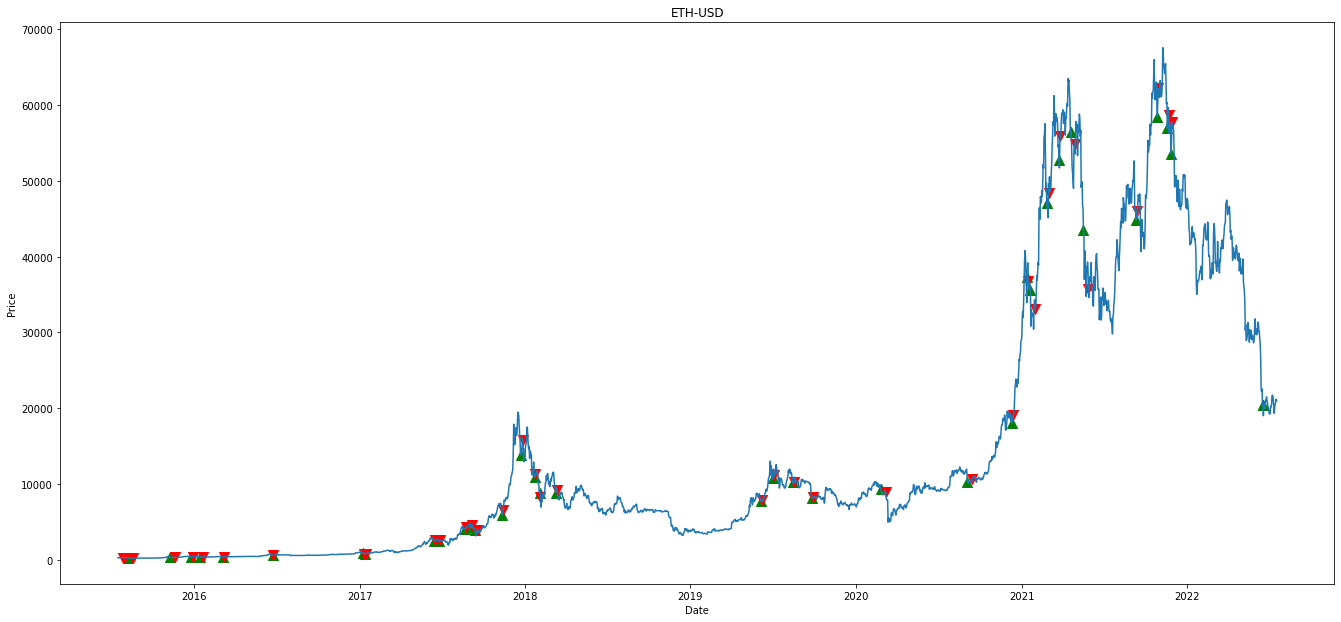

In [279]:
plt.subplot(111, xlabel='Date', ylabel='Price', title='ETH-USD')
# set size of subplot
plt.subplots_adjust(left=0.05, right=3, top=2, bottom=0.05)
plt.plot(df['Close'])
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker='^', color='green', s=100)
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker='v', color='red', s=100)

In [280]:
buys

[266.65397094726563,
 265.40559326171876,
 270.61155792236326,
 274.1355932617187,
 362.1669711303711,
 425.4798373413086,
 417.3968197631836,
 398.61082550048826,
 578.2325469970702,
 881.3274713134765,
 780.68896484375,
 2431.179013671875,
 2443.0032568359375,
 3965.0301147460937,
 4109.220756835937,
 3999.251743164062,
 6166.872094726562,
 15328.81337890625,
 10852.941621093749,
 8895.423837890625,
 9057.423310546876,
 7589.504501953124,
 10265.64072265625,
 9750.152978515625,
 8232.383369140625,
 9399.43830078125,
 10983.695537109375,
 17717.042421875,
 32905.272109375,
 34987.710546875,
 48214.172070312496,
 53096.776953125,
 54052.537656249995,
 45062.376835937495,
 44999.679218749996,
 59551.808671875,
 58556.9713671875,
 55233.872617187495]

In [281]:
sells

[289.1029968261719,
 287.6960144042969,
 284.6860046386719,
 225.67100524902344,
 322.0920104980469,
 433.29998779296875,
 419.6319885253906,
 407.7569885253906,
 665.281005859375,
 908.114990234375,
 818.1420288085938,
 2514.010009765625,
 2553.030029296875,
 4137.60009765625,
 4589.14013671875,
 4073.7900390625,
 6561.47998046875,
 16163.5,
 10903.400390625,
 9175.7001953125,
 9602.9296875,
 8036.77490234375,
 11972.71875,
 10358.72265625,
 8251.2734375,
 9121.6005859375,
 10328.734375,
 18806.765625,
 39156.70703125,
 34270.87890625,
 49612.10546875,
 55137.56640625,
 55036.63671875,
 38507.08203125,
 45206.62890625,
 60624.87109375,
 59730.5078125,
 57291.90625]

In [282]:
profits = pd.DataFrame([(sell - buy)/buy for sell, buy in zip(sells, buys)], columns=['profit'])
display(profits)
(profits+1).cumprod() 

,profit
0,0.084188
1,0.083986
2,0.052010
3,-0.176791
4,-0.110653
5,0.018380
6,0.005355
7,0.022945
8,0.150542
9,0.030395


,profit
0,1.084188
1,1.175245
2,1.236369
3,1.017791
4,0.905169
5,0.921805
6,0.926742
7,0.948006
8,1.090721
9,1.123873


In [284]:
display((profits+1).cumprod())
(df.Close.pct_change()+1).cumprod()

,profit
0,1.084188
1,1.175245
2,1.236369
3,1.017791
4,0.905169
5,0.921805
6,0.926742
7,0.948006
8,1.090721
9,1.123873


Date
2015-07-18          NaN
2015-07-19     0.995318
2015-07-20     1.014842
2015-07-21     1.003390
2015-07-22     1.008443
                ...    
2022-07-13    73.524920
2022-07-14    74.826646
2022-07-15    75.795752
2022-07-16    77.083446
2022-07-17    76.411855
Name: Close, Length: 2557, dtype: float64